In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from joblib import dump, load
from sklearn.metrics import accuracy_score, precision_score

In [2]:
accident_data = pd.read_csv('accident.csv')
accident_data.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [3]:
accident_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,43.425000,14.941910,18.0,31.0,43.5,56.0,69.0
Speed_of_Impact,197.0,70.441624,30.125298,20.0,43.0,71.0,95.0,119.0
Survived,200.0,0.505000,0.501230,0.0,0.0,1.0,1.0,1.0


In [4]:
n_data = accident_data.dropna()

In [5]:
n_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,196.0,43.341837,15.004973,18.0,31.0,44.0,56.0,69.0
Speed_of_Impact,196.0,70.433673,30.202236,20.0,43.0,71.0,95.5,119.0
Survived,196.0,0.510204,0.501176,0.0,0.0,1.0,1.0,1.0


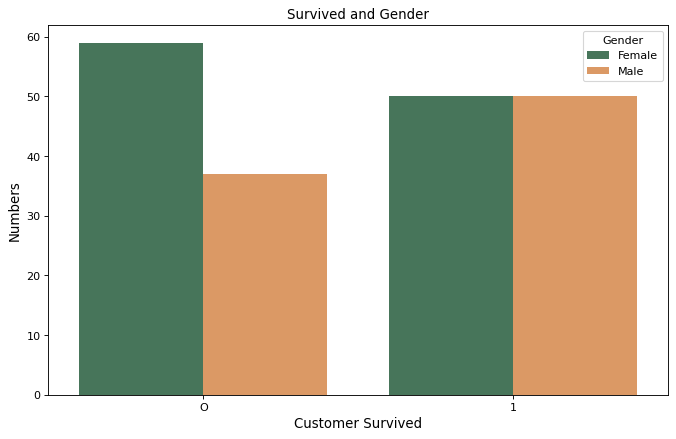

In [6]:
data = n_data[['Survived', 'Gender']]
grouped_data = data.groupby(['Survived', 'Gender']).size().reset_index(name='Counts')

fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
grouped_data['Survived'] = grouped_data['Survived'].replace({0: 'O', 1: '1'})
grouped_data['Gender'] = grouped_data['Gender'].replace({0: 'Male', 1: 'Female'})

sns.barplot(x='Survived', y='Counts', hue='Gender', data=grouped_data, palette=['#3F7D58', '#EF9651'])
ax.set_title('Survived and Gender')
ax.set_ylabel('Numbers', size=12)
ax.set_xlabel('Customer Survived', size=12)
plt.show()

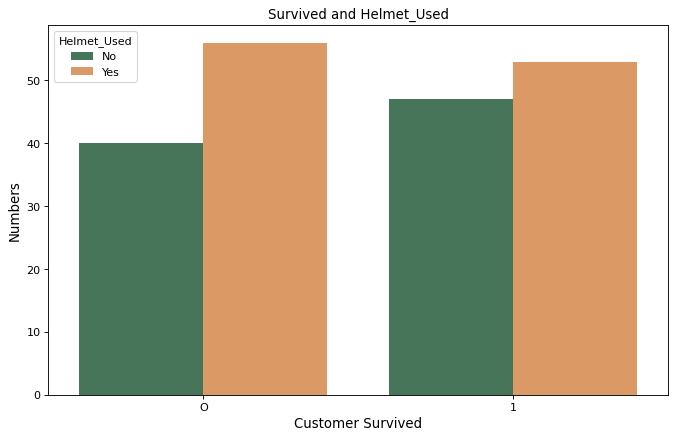

In [7]:
data = n_data[['Survived', 'Helmet_Used']]
grouped_data = data.groupby(['Survived', 'Helmet_Used']).size().reset_index(name='Counts')

fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
grouped_data['Survived'] = grouped_data['Survived'].replace({0: 'O', 1: '1'})
grouped_data['Helmet_Used'] = grouped_data['Helmet_Used'].replace({0: 'Male', 1: 'Female'})

sns.barplot(x='Survived', y='Counts', hue='Helmet_Used', data=grouped_data, palette=['#3F7D58', '#EF9651'])
ax.set_title('Survived and Helmet_Used')
ax.set_ylabel('Numbers', size=12)
ax.set_xlabel('Customer Survived', size=12)
plt.show()

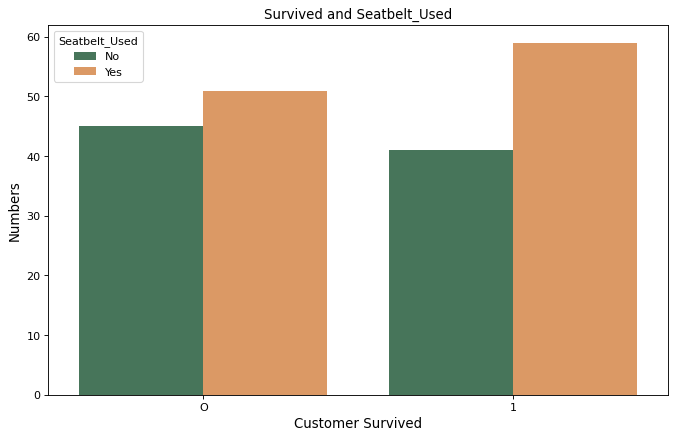

In [8]:
data = n_data[['Survived', 'Seatbelt_Used']]
grouped_data = data.groupby(['Survived', 'Seatbelt_Used']).size().reset_index(name='Counts')

fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
grouped_data['Survived'] = grouped_data['Survived'].replace({0: 'O', 1: '1'})
grouped_data['Seatbelt_Used'] = grouped_data['Seatbelt_Used'].replace({0: 'Male', 1: 'Female'})

sns.barplot(x='Survived', y='Counts', hue='Seatbelt_Used', data=grouped_data, palette=['#3F7D58', '#EF9651'])
ax.set_title('Survived and Seatbelt_Used')
ax.set_ylabel('Numbers', size=12)
ax.set_xlabel('Customer Survived', size=12)
plt.show()

In [9]:
x = accident_data.drop(columns=['Survived'])
y = accident_data['Survived']

In [10]:
categorical_features = ['Gender', 'Helmet_Used', 'Seatbelt_Used']
encoder = BinaryEncoder()
x_encoded = encoder.fit_transform(x[categorical_features])
x = x.drop(categorical_features, axis=1)
x = x.reset_index(drop=True)
x_encoded = x_encoded.reset_index(drop=True)
x = pd.concat([x, x_encoded], axis=1)

In [11]:
imputer = SimpleImputer(strategy='mean')
x_imputed = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

# Apply SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x_imputed, y)

In [12]:
y.value_counts()

Survived
1    101
0    101
Name: count, dtype: int64

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .25, random_state=42)

In [14]:
dcs = DecisionTreeClassifier()
dcs.fit(x_train, y_train)
export_graphviz(dcs, out_file='tree.dot', filled=True, feature_names=x_train.columns)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph) 

#save model
dump(dcs, "decision_tree_model.joblib")

['decision_tree_model.joblib']

In [15]:
dcs_prediction = dcs.predict(x_test)
dcs_accuracy = accuracy_score(dcs_prediction, y_test)
dcs_precision = precision_score(dcs_prediction, y_test)

print(f"Accuracy: {dcs_accuracy*100}")
print(f"Precision: {dcs_precision*100}")

Accuracy: 50.98039215686274
Precision: 56.52173913043478


In [16]:
loaded_model = load("decision_tree_model.joblib")
loaded_prediction = loaded_model.predict(x_test)